In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [177]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [178]:
df = pd.read_csv('Leads.csv',encoding='utf-8')

In [179]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [180]:
# percent of converted
df.Converted.value_counts()/len(df)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

In [181]:
# % of null values
100*df.isnull().sum()/len(df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [182]:
# Removing columns with null values more than 20%
df1 = df.dropna(thresh=df.shape[0]*0.8,how='all',axis=1)

In [183]:
# % of null values
100*df1.isnull().sum()/len(df1)

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Specialization                              15.562771
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement                        0.000000
Through Recommendations     

In [184]:
df1 = df1.dropna(subset=['Specialization','City','Lead Source','TotalVisits','Page Views Per Visit','Last Activity'])

In [185]:
# % of null values
100*df1.isnull().sum()/len(df1)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7629 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               7629 non-null   object 
 1   Lead Number                               7629 non-null   int64  
 2   Lead Origin                               7629 non-null   object 
 3   Lead Source                               7629 non-null   object 
 4   Do Not Email                              7629 non-null   object 
 5   Do Not Call                               7629 non-null   object 
 6   Converted                                 7629 non-null   int64  
 7   TotalVisits                               7629 non-null   float64
 8   Total Time Spent on Website               7629 non-null   int64  
 9   Page Views Per Visit                      7629 non-null   float64
 10  Last Activity                       

#### EDA

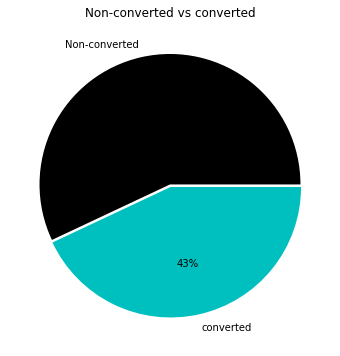

In [186]:
# Pie chart to visualize Converted vs Non-converted
plt.figure(figsize=(8,6))
plt.pie(df1['Converted'].value_counts(),labels=["Non-converted","converted" ],
        autopct='%1.f%%',explode = (0.01, 0.01),colors =('k','c'))
plt.title('Non-converted vs converted')
plt.show()

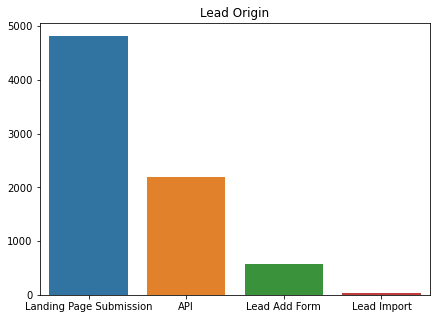

In [187]:
# Plotting different Lead Origin
plt.figure(figsize=(7,5))
plt.title('Lead Origin')

y_axis = df1['Lead Origin'].value_counts().values
x_axis = df1['Lead Origin'].value_counts().index

sns.barplot(x=x_axis,y=y_axis,data=df1)
plt.show()

In [188]:
df1['Lead Source'].value_counts()[0:5]

Google            2514
Direct Traffic    2463
Organic Search    1029
Olark Chat         917
Reference          443
Name: Lead Source, dtype: int64

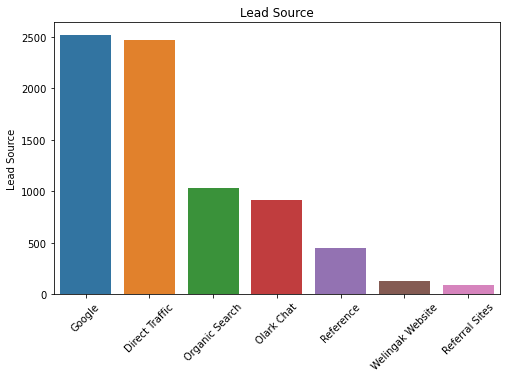

In [189]:
# Plotting different lead sources vs no. of leads
plt.figure(figsize=(8,5))
plt.title('Lead Source')

y_axis = df1['Lead Source'].value_counts()[0:7]
x_axis = df1['Lead Source'].value_counts().index[0:7]

sns.barplot(x=x_axis,y=y_axis,data=df1)
plt.xticks(rotation=45)
plt.show()

Most leads come from Google followed by Direct Traffic

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

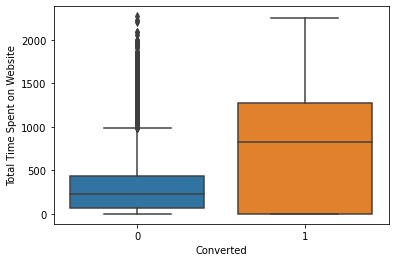

In [190]:
sns.boxplot(x='Converted',y='Total Time Spent on Website',data=df1)

Clearly people who have converted in the past, also have spent more time on website

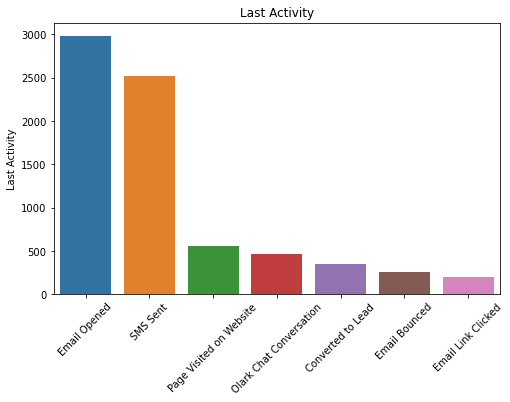

In [191]:
# Plotting different last activities
plt.figure(figsize=(8,5))
plt.title('Last Activity')

y_axis = df1['Last Activity'].value_counts()[0:7]
x_axis = df1['Last Activity'].value_counts().index[0:7]

sns.barplot(x=x_axis,y=y_axis,data=df1)
plt.xticks(rotation=45)
plt.show()

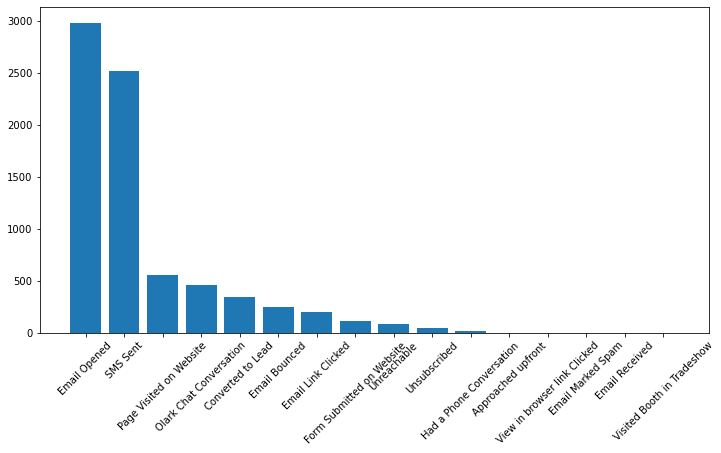

In [192]:
# Last activity

plt.figure(figsize=(12,6))
plt.bar(x=df1['Last Activity'].value_counts().index,
        height=df1['Last Activity'].value_counts())

plt.xticks(rotation=45)
plt.show()

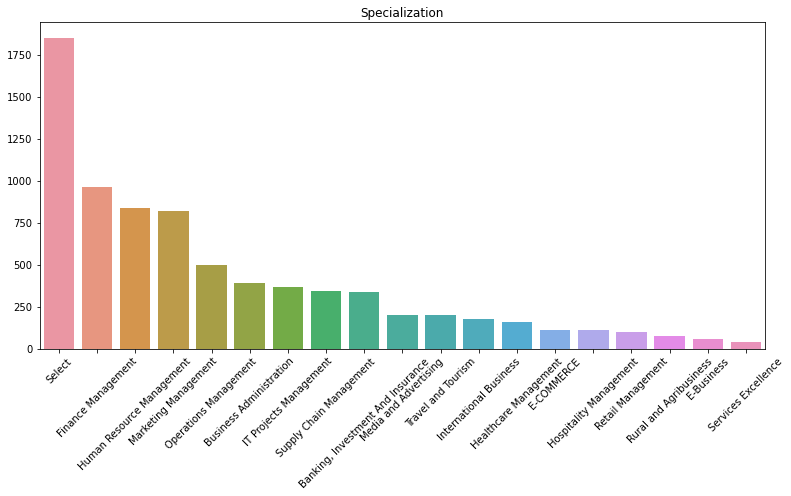

In [193]:
# Interest in specialization
plt.figure(figsize=(13,6))
plt.title('Specialization')

#define data
height = df1['Specialization'].value_counts().values
x= df1['Specialization'].value_counts().index
#create bar graph
sns.barplot(x,height,data=df1)
plt.xticks( rotation=45)
plt.show()

Most interest is shown in Finance Management specialisation. 

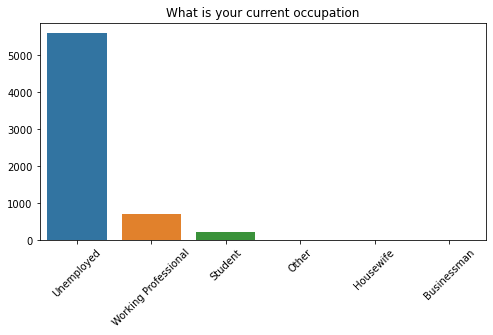

In [194]:
# Proffession of leads
plt.figure(figsize=(8,4))
plt.title('What is your current occupation')

#define data
height =df['What is your current occupation'].value_counts().values
x= df['What is your current occupation'].value_counts().index
#create bar graph
sns.barplot(x,height,data=df1)
plt.xticks( rotation=45)
plt.show()

Majority of leads are unemployed. This highlights the customer segment that the company should focus on.

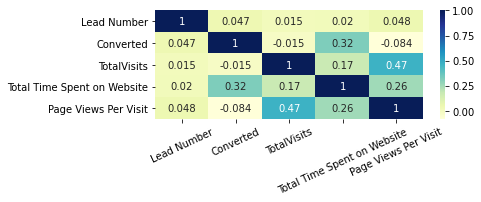

In [195]:
plt.figure(figsize=(6,2))
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu')
plt.xticks(rotation=25)
plt.show()

#### Bivariate Analysis

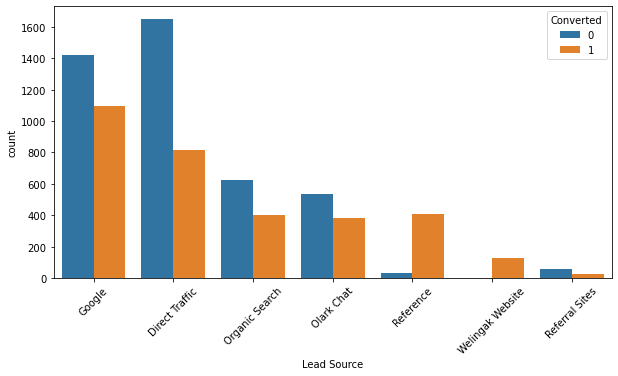

In [196]:
# Plotting Lead Source vs Count of converted & non-converted
plt.figure(figsize=(10,5))
sns.countplot(df1['Lead Source'],hue='Converted',data=df1,
              order=df1['Lead Source'].value_counts().index[0:7])
plt.xticks(rotation=45)
plt.show()

Most number of coverted leads are from Google, followed by Direct Traffic. Thus it will make sense for the company to invest in Google advertising.

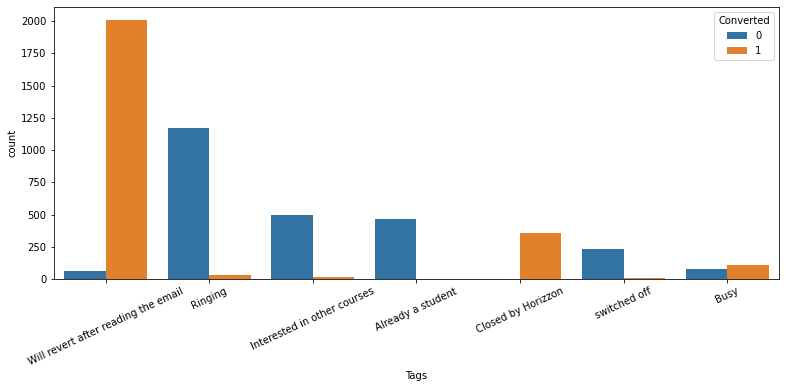

In [197]:
# Plotting Tags vs Count of converted & non-converted
plt.figure(figsize=(13,5))
sns.countplot(df['Tags'],hue='Converted',data=df,
              order=df['Tags'].value_counts().index[0:7])
plt.xticks(rotation=25)
plt.show()

People with Tags 'Will revert after reading the mail' are most probable to convert. Sales team should give good amount of attention and service to these people. At the same time people not picking up phoen, represented by 'Ringing' are least probable to convert. They should be given limited span of attention.

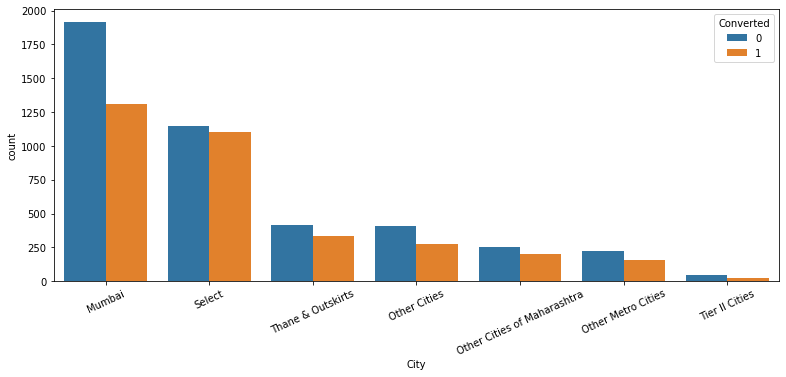

In [198]:
# Plotting city vs Count of converted & non-converted
plt.figure(figsize=(13,5))
sns.countplot(df['City'],hue='Converted',data=df,
              order=df['City'].value_counts().index[0:7])
plt.xticks(rotation=25)
plt.show()

Mumbai and Thane are major places from where the leads are coming. Since the area is limited, company can go for offline marketing like using Billboards, Radio. Also the company should think about expansion to neighbouring cities like Pune and Nagpur.

#### Data Cleaning

Converting Yes/No questions to 1/0

In [199]:
df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [200]:
df1.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,7629,7629.000000,7629,7629,7629,7629,7629.000000,7629.000000,7629.000000,7629.000000,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629,7629
unique,7629,NaN,4,19,2,2,NaN,NaN,NaN,NaN,16,19,2,1,2,2,2,2,2,1,1,1,7,1,2,15
top,bcf65e89-e82a-4a17-bdbd-593558b3f7bd,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,Select,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
freq,1,NaN,4820,2514,7021,7627,NaN,NaN,NaN,NaN,2986,1849,7618,7629,7627,7628,7628,7625,7622,7629,7629,7629,3164,7629,4744,2484
mean,NaN,616803.905754,NaN,NaN,NaN,NaN,0.430069,3.812164,533.176563,2.624260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,23300.048332,NaN,NaN,NaN,NaN,0.495118,5.092689,554.482742,2.153255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,596360.000000,NaN,NaN,NaN,NaN,0.000000,2.000000,61.000000,1.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,614685.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,295.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,637183.000000,NaN,NaN,NaN,NaN,1.000000,5.000000,1010.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
# Removing columns with very less variance
df1.drop(['Magazine','Do Not Call','Search','Newspaper Article',
          'X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Receive More Updates About Our Courses',
         'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'],
         axis=1,inplace=True)

In [202]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7629 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             7629 non-null   object 
 1   Lead Number                             7629 non-null   int64  
 2   Lead Origin                             7629 non-null   object 
 3   Lead Source                             7629 non-null   object 
 4   Do Not Email                            7629 non-null   object 
 5   Converted                               7629 non-null   int64  
 6   TotalVisits                             7629 non-null   float64
 7   Total Time Spent on Website             7629 non-null   int64  
 8   Page Views Per Visit                    7629 non-null   float64
 9   Last Activity                           7629 non-null   object 
 10  Specialization                          7629 non-null   obje

In [203]:
df1.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
count,7629,7629.000000,7629,7629,7629,7629.000000,7629.000000,7629.000000,7629.000000,7629,7629,7629,7629,7629
unique,7629,NaN,4,19,2,NaN,NaN,NaN,NaN,16,19,7,2,15
top,bcf65e89-e82a-4a17-bdbd-593558b3f7bd,NaN,Landing Page Submission,Google,No,NaN,NaN,NaN,NaN,Email Opened,Select,Mumbai,No,Modified
freq,1,NaN,4820,2514,7021,NaN,NaN,NaN,NaN,2986,1849,3164,4744,2484
mean,NaN,616803.905754,NaN,NaN,NaN,0.430069,3.812164,533.176563,2.624260,NaN,NaN,NaN,NaN,NaN
std,NaN,23300.048332,NaN,NaN,NaN,0.495118,5.092689,554.482742,2.153255,NaN,NaN,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,596360.000000,NaN,NaN,NaN,0.000000,2.000000,61.000000,1.330000,NaN,NaN,NaN,NaN,NaN
50%,NaN,614685.000000,NaN,NaN,NaN,0.000000,3.000000,295.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,637183.000000,NaN,NaN,NaN,1.000000,5.000000,1010.000000,4.000000,NaN,NaN,NaN,NaN,NaN


In [204]:
# variable columns
var_col = ['Lead Origin', 'Lead Source','Do Not Email','Last Activity',
           'Specialization', 'City', 'A free copy of Mastering The Interview',
           'Last Notable Activity']

In [205]:
# unique values
for col in var_col:
    print(col,'*****',df[col].unique(),'\n')

Lead Origin ***** ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

Lead Source ***** ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

Do Not Email ***** ['No' 'Yes'] 

Last Activity ***** ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam'] 

Specialization ***** ['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 '

In [206]:
# creating dummy variables
dummy = pd.get_dummies(df1[var_col],drop_first=True)

In [207]:
# concat 
df2 = pd.concat([df1,dummy],axis=1)

In [208]:
# drop columns
df2.drop(var_col,axis=1,inplace=True)

In [209]:
df2.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [210]:
# drop identifiers
# corr matrix
# train test split
# scaling
# model building

In [211]:
# drop identifiers
df2.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [212]:
df2.describe(include='all')

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000,7629.000000
mean,0.430069,3.812164,533.176563,2.624260,0.631800,0.076157,0.003539,0.322847,0.003670,0.329532,0.000262,0.000131,0.120199,0.134880,0.000131,0.000262,0.058068,0.011011,0.000262,0.000131,0.016909,0.000393,0.000524,0.000131,0.000131,0.079696,0.045615,0.033425,0.026871,0.000262,0.391401,0.000262,0.014943,0.003146,0.060689,0.073797,0.330450,0.011273,0.006554,0.000524,0.000131,0.051383,0.007471,0.014550,0.125705,0.020448,0.014550,0.109582,0.047975,0.023070,0.107616,0.026478,0.065277,0.013108,0.009569,0.242365,0.005243,0.045222,0.026478,0.088740,0.057806,0.049155,0.282606,0.097260

In [213]:
# train test split
from sklearn.model_selection import train_test_split

In [214]:
X = df2.drop('Converted',axis=1)
y = df2['Converted']

In [215]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100) 

In [216]:
X_train.shape,X_test.shape

((5340, 79), (2289, 79))

In [217]:
y_train.shape,y_test.shape

((5340,), (2289,))

In [218]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [219]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train_scaled = X_train.copy(deep=True)
X_test_scaled = X_test.copy(deep=True)
X_train_scaled[num_vars] = scaler.fit_transform(X_train_scaled[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test_scaled[num_vars])

In [220]:
X_train_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
661,0.027027,0.659771,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7895,0.027027,0.488556,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9108,0.054054,0.864877,0.250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
991,0.054054,0.257482,0.250,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6659,0.054054,0.049736,0.250,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [221]:
# Model building using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
log_reg = LogisticRegression()
rfe = RFE(log_reg,15)
rfe = rfe.fit(X_train_scaled,y_train)

In [222]:
list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 29),
 ('Lead Source_NC_EDM', False, 59),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 37),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 47),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_google', False, 21),
 ('Lead Source_testone', False, 60),
 ('Lead Source_welearnblog_Home', False, 61),
 ('Do Not Email_Yes', True, 1),
 ('Las

In [223]:
col = X_train_scaled.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Select',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [224]:
X_train_new = X_train_scaled[col]

<AxesSubplot:>

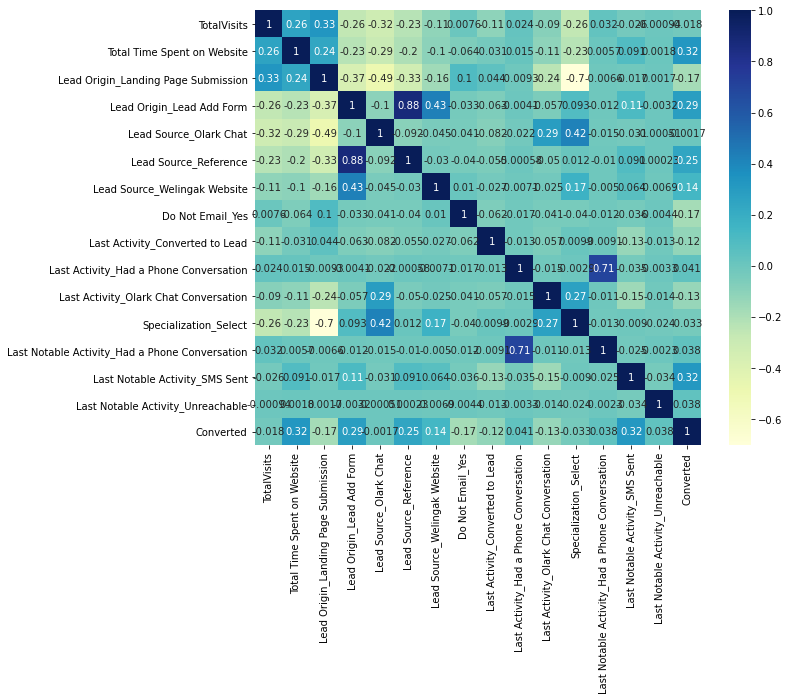

In [225]:
# Visualizing correlation
plt.figure(figsize=(10,8))
sample_df = pd.concat([X_train_new,y_train],axis=1)
sns.heatmap(sample_df.corr(),annot=True,cmap='YlGnBu')

Top 3 

In [226]:
import statsmodels.api as sm

In [227]:
# Model 1
log_reg = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
lr_model = log_reg.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5324
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2474.5
Date:                Mon, 23 Jan 2023   Deviance:                       4949.0
Time:                        12:07:28   Pearson chi2:                 5.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9364      0.140     -6.684      0.000      -1.211      -0.662
TotalVisits                                        1.6947      0.795      2.133      0.033       0.137       3.252
Total Time Spent on Website                        4.4738      0.168     26.585      0.000       4.144       4.804
Lead Origin_Landing Page Submission               -1.3350      0.128    -10.419      0.000      -1.586      -1.084
Lead Origin_Lead Add Form                          1.1260      0.900      1.251      0.211      -0.638       2.890
Lead Source_Olark Chat                             1.2781      0.141      9.044      0.000       1.001       1.555
Lead Source_Reference                              2.2051      0.921      2.393      0.017       0.399       4.011
Lead Source_Welingak Website                       5.0413      1.361      3.705      0.000       2.375       7.708
Do Not Email_Yes                                  -1.7985      0.182     -9.884      0.000      -2.155      -1.442
Last Activity_Converted to Lead                   -0.7735      0.202     -3.829      0.000      -1.169      -0.378
Last Activity_Had a Phone Conversation             1.0995      0.786      1.398      0.162      -0.442       2.641
Last Activity_Olark Chat Conversation             -1.1977      0.179     -6.703      0.000      -1.548      -0.847
Specialization_Select                             -1.1348      0.129     -8.827      0.000      -1.387      -0.883
Last Notable Activity_Had a Phone Conversation     1.9153      1.353      1.416      0.157      -0.736       4.567
Last Notable Activity_SMS Sent                     1.4243      0.081     17.588      0.000       1.266       1.583
Last Notable Activity_Unreachable                  2.0833      0.658      3.165      0.002       0.793       3.373
==================================================================================================================
"""

In [228]:
# vif values
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [229]:
# VIF 1
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i)for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,56.39
5,Lead Source_Reference,45.23
6,Lead Source_Welingak Website,12.21
2,Lead Origin_Landing Page Submission,2.90
0,TotalVisits,2.33
1,Total Time Spent on Website,2.08
9,Last Activity_Had a Phone Conversation,2.01
12,Last Notable Activity_Had a Phone Conversation,2.00
11,Specialization_Select,1.84
4,Lead Source_Olark Chat,1.51


In [230]:
# Dropping 'Lead Origin_Lead Add Form' and 'Lead Source_Reference'
X_train_new.drop(['Lead Origin_Lead Add Form'],axis=1,inplace=True)

In [231]:
# VIF 2
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i)for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.90
0,TotalVisits,2.33
1,Total Time Spent on Website,2.08
8,Last Activity_Had a Phone Conversation,2.01
11,Last Notable Activity_Had a Phone Conversation,2.00
10,Specialization_Select,1.84
3,Lead Source_Olark Chat,1.51
12,Last Notable Activity_SMS Sent,1.44
9,Last Activity_Olark Chat Conversation,1.23
6,Do Not Email_Yes,1.11


In [232]:
# Model 2
log_reg = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
lr_model = log_reg.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5325
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2475.3
Date:                Mon, 23 Jan 2023   Deviance:                       4950.6
Time:                        12:07:30   Pearson chi2:                 5.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9183      0.139     -6.585      0.000      -1.192      -0.645
TotalVisits                                        1.6537      0.795      2.080      0.038       0.095       3.212
Total Time Spent on Website                        4.4676      0.168     26.575      0.000       4.138       4.797
Lead Origin_Landing Page Submission               -1.3484      0.128    -10.551      0.000      -1.599      -1.098
Lead Source_Olark Chat                             1.2690      0.141      8.998      0.000       0.993       1.545
Lead Source_Reference                              3.3164      0.244     13.592      0.000       2.838       3.795
Lead Source_Welingak Website                       6.1569      1.028      5.991      0.000       4.143       8.171
Do Not Email_Yes                                  -1.7994      0.182     -9.890      0.000      -2.156      -1.443
Last Activity_Converted to Lead                   -0.7770      0.202     -3.847      0.000      -1.173      -0.381
Last Activity_Had a Phone Conversation             1.0971      0.786      1.396      0.163      -0.444       2.638
Last Activity_Olark Chat Conversation             -1.2013      0.179     -6.724      0.000      -1.551      -0.851
Specialization_Select                             -1.1424      0.128     -8.892      0.000      -1.394      -0.891
Last Notable Activity_Had a Phone Conversation     1.9158      1.353      1.416      0.157      -0.736       4.567
Last Notable Activity_SMS Sent                     1.4249      0.081     17.595      0.000       1.266       1.584
Last Notable Activity_Unreachable                  2.0800      0.658      3.160      0.002       0.790       3.370
==================================================================================================================
"""

In [233]:
# Removing columns with high p-value
X_train_new.drop(['Last Activity_Had a Phone Conversation',
                  'Last Notable Activity_Had a Phone Conversation'],axis=1,inplace=True)

In [234]:
# Model 3
log_reg = sm.GLM(y_train,sm.add_constant(X_train_new),family=sm.families.Binomial())
lr_model = log_reg.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5340
Model:                            GLM   Df Residuals:                     5327
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2482.2
Date:                Mon, 23 Jan 2023   Deviance:                       4964.5
Time:                        12:07:32   Pearson chi2:                 5.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8987      0.139     -6.466      0.000      -1.171      -0.626
TotalVisits                               1.7460      0.791      2.209      0.027       0.196       3.295
Total Time Spent on Website               4.4539      0.168     26.559      0.000       4.125       4.783
Lead Origin_Landing Page Submission      -1.3576      0.127    -10.648      0.000      -1.607      -1.108
Lead Source_Olark Chat                    1.2557      0.141      8.923      0.000       0.980       1.532
Lead Source_Reference                     3.3042      0.244     13.553      0.000       2.826       3.782
Lead Source_Welingak Website              6.1455      1.028      5.980      0.000       4.131       8.160
Do Not Email_Yes                         -1.8059      0.182     -9.935      0.000      -2.162      -1.450
Last Activity_Converted to Lead          -0.7875      0.202     -3.903      0.000      -1.183      -0.392
Last Activity_Olark Chat Conversation    -1.2113      0.179     -6.782      0.000      -1.561      -0.861
Specialization_Select                    -1.1446      0.128     -8.928      0.000      -1.396      -0.893
Last Notable Activity_SMS Sent            1.4130      0.081     17.482      0.000       1.255       1.571
Last Notable Activity_Unreachable         2.0660      0.658      3.138      0.002       0.776       3.356
=========================================================================================================
"""

In [235]:
# Prediction
y_train_pred = lr_model.predict(sm.add_constant(X_train_new)).values.reshape(-1)
y_train_df = pd.DataFrame({'ID':y_train.index,'Real_values':y_train.values,
                                   'Probability':y_train_pred})
y_train_df['Score'] = round(y_train_df['Probability']*100,0)
y_train_df['pred_values'] = y_train_df.Probability.map(lambda x: 1 if x > 0.5 else 0)

In [236]:
y_train_df.head()

,ID,Real_values,Probability,Score,pred_values
0,661,1,0.674674,67.0,1
1,7895,1,0.491709,49.0,0
2,9108,0,0.957019,96.0,1
3,991,0,0.309560,31.0,0
4,6659,0,0.125601,13.0,0


In [237]:
# Evaluation Metrics
from sklearn import metrics

In [238]:
confusion = metrics.confusion_matrix(y_train_df.Real_values,y_train_df.pred_values)
confusion

array([[2587,  469],
       [ 685, 1599]], dtype=int64)

In [239]:
# Actual/Predicted 0     1
#               0  TN | FP
#               1  FN | TP

TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

In [240]:
# Sensitivity (Ability of the model to predict probable hot leads out of the total leads )
TP/(TP + FN)

0.7000875656742557

In [241]:
# Specificty (Ability of the model to predict probable non-leads out of the total leads )
TN/(TN + FP)

0.8465314136125655

In [242]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.7838951310861423

In [243]:
# ROC Curve
def draw_roc(actual, probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (AUC = %0.2f)'%auc_score) # 0.2f means that only 2 decimals after the number will be displayed
    plt.plot([0,1],[0,1],'k--')  # K-- means that line will be made of dashes'--'
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

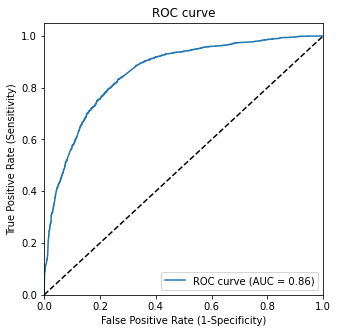

In [244]:
draw_roc(y_train_df.Real_values,y_train_df.Probability)

In [245]:
# finding optimal cutoff point
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in num:
    y_train_df[i] = y_train_df.Probability.map(lambda x: 1 if x > i else 0)

In [246]:
y_train_df.head()

,ID,Real_values,Probability,Score,pred_values,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1
0,661,1,0.674674,67.0,1,1,1,1,1,1,1,1,0,0,0,0
1,7895,1,0.491709,49.0,0,1,1,1,1,1,0,0,0,0,0,0
2,9108,0,0.957019,96.0,1,1,1,1,1,1,1,1,1,1,1,0
3,991,0,0.309560,31.0,0,1,1,1,1,0,0,0,0,0,0,0
4,6659,0,0.125601,13.0,0,1,1,0,0,0,0,0,0,0,0,0


In [247]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['tresh_prob','accuracy','precision','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.Real_values, y_train_df[i] )
    
    TN = cm1[0,0]
    FP = cm1[0,1]
    FN = cm1[1,0]
    TP = cm1[1,1]
    
    total1=sum(sum(cm1))             # this gives total number of datapoints
    
    accuracy = round((TP+TN)/total1,2)
    speci = round(TN/(TN + FP),2)
    precision = round(TP/(TP + FP),2)
    sensi = round(TP/(TP + FN),2)
    
    cutoff_df.loc[i] =[i,accuracy,precision,sensi,speci]

cutoff_df

,tresh_prob,accuracy,precision,sensi,speci
0.0,0.0,0.43,0.43,1.00,0.00
0.1,0.1,0.52,0.47,0.99,0.17
0.2,0.2,0.72,0.62,0.93,0.57
0.3,0.3,0.76,0.67,0.89,0.67
0.4,0.4,0.78,0.73,0.78,0.78
0.5,0.5,0.78,0.77,0.70,0.85
0.6,0.6,0.77,0.80,0.60,0.89
0.7,0.7,0.74,0.83,0.48,0.93
0.8,0.8,0.71,0.88,0.37,0.96
0.9,0.9,0.66,0.91,0.23,0.98


- From a business point of view it makes sense to keep the cutoff point at 0.3 probability. 
- At 0.3, the sales team will be able to talk to around 90% of the hot leads who will most probably convert.
- And they will only make 30% calls to people who will not convert.
- But since the company's CEO has requested that the lead conversion rate should be 80%, we would have to keep the threshold probability above 0.07 and Score above 70
- But at 0.07 the setback is that the sales team will be able to talk to only 50% of the possible hot leads
- Although this will save time but it will result in reduced business.
- So the score above which the sales team should call depends on the business goals.
- If the company wants to save on employee hours, then they should keep the threshold score as 70 but if they want to increase business, they go for any lead with a score of above 30

In [248]:
# Giving scores to test dataset
X_test_new = X_test_scaled[X_train_new.columns]

In [249]:
X_test_new.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Specialization_Select,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
747,0.067568,0.125440,1,0,0,0,0,0,0,0,0,0
3589,0.189189,0.658011,1,0,0,0,0,0,0,0,0,0
5112,0.054054,0.239877,1,0,0,0,1,0,0,0,0,0
6492,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0
5746,0.297297,0.334067,1,0,0,0,0,0,0,0,0,0


In [250]:
# y_test predictions at cut off score of 70
y_test_pred = lr_model.predict(sm.add_constant(X_test_new)).values.reshape(-1)
y_test_df = pd.DataFrame({'ID':y_test.index,'Real_values':y_test.values,
                          'Probability':y_test_pred})
y_test_df['Score'] = round(y_test_df['Probability']*100,0)
y_test_df['pred_values'] = y_test_df.Probability.map(lambda x:1 if x > 0.7 else 0)

In [251]:
y_test_df.head()

,ID,Real_values,Probability,Score,pred_values
0,747,1,0.170844,17.0,0
1,3589,1,0.731980,73.0,1
2,5112,0,0.052178,5.0,0
3,6492,0,0.312682,31.0,0
4,5746,1,0.437983,44.0,0


In [252]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_df.Real_values,y_test_df.pred_values)
confusion

array([[1203,   89],
       [ 495,  502]], dtype=int64)

In [253]:
# Actual/Predicted 0     1
#               0  TN | FP
#               1  FN | TP

TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

In [254]:
# Sensitivity (Ability of the model to predict probable hot leads out of the total leads )
TP/(TP + FN)

0.5035105315947843

In [255]:
# Specificty (Ability of the model to predict probable non-leads out of the total leads )
TN/(TN + FP)

0.9311145510835913

In [256]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.744866754041066

In [257]:
# Precision (This measure gives the number of people converted out of the total predited Hot leads)
TP/(TP+FP)

0.8494077834179357

In [258]:
# y_test predictions at cut off score of 30
y_test_pred = lr_model.predict(sm.add_constant(X_test_new)).values.reshape(-1)
y_test_df = pd.DataFrame({'ID':y_test.index,'Real_values':y_test.values,
                          'Probability':y_test_pred})
y_test_df['Score'] = round(y_test_df['Probability']*100,0)
y_test_df['pred_values'] = y_test_df.Probability.map(lambda x:1 if x > 0.3 else 0)

In [259]:
y_test_df.head()

,ID,Real_values,Probability,Score,pred_values
0,747,1,0.170844,17.0,0
1,3589,1,0.731980,73.0,1
2,5112,0,0.052178,5.0,0
3,6492,0,0.312682,31.0,1
4,5746,1,0.437983,44.0,1


In [260]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_df.Real_values,y_test_df.pred_values)
confusion

array([[839, 453],
       [116, 881]], dtype=int64)

In [261]:
# Actual/Predicted 0     1
#               0  TN | FP
#               1  FN | TP

TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

In [262]:
# Sensitivity (Ability of the model to predict probable hot leads out of the total leads )
TP/(TP + FN)

0.8836509528585758

In [263]:
# Specificty (Ability of the model to predict probable non-leads out of the total leads )
TN/(TN + FP)

0.6493808049535603

In [264]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.7514198339886413

In [265]:
# Precision (This measure gives the number of people converted out of the total predited Hot leads)
TP/(TP+FP)

0.6604197901049476

Conclusion - The team when targets people with a score of above 70, they are able to convert 85% of them into paying customers. This Data analysis and Machine learning model improved has the capacity to improve the efficience of team from a previous 30% conversion rate to a 85% conversion rate.

Monetory impact - Since the efficiency is doubled, one sales person can do work of two people. So if the salary of one sales person is 30,000 and the company has a team 100 people. Then each most it is able to save around 15 Lakhs in salary. This is a good impact.